In [1]:
import numpy as np
from matplotlib import pyplot as plt

from math import pi
import cv2
from google.colab.patches import cv2_imshow
import sys
import random
import math
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from sklearn.decomposition import PCA

In [2]:
from scipy import interpolate

In [3]:
def hanging_line(point1, point2):
    import numpy as np

    a = (point2[1] - point1[1])/(np.cosh(point2[0]) - np.cosh(point1[0]))
    b = point1[1] - a*np.cosh(point1[0])
    x = np.linspace(point1[0], point2[0], 100)
    y = a*np.cosh(x) + b

    return (x,y)

In [4]:
def make_image(data, outputname, size=(10, 10), dpi=300):
    fig = plt.figure()
    fig.set_size_inches(size)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    plt.set_cmap('hot')
    ax.imshow(data, aspect='equal')
    plt.savefig(outputname, dpi=dpi,transparent = True, bbox_inches = 'tight', pad_inches = 0)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


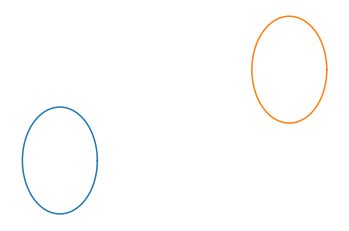

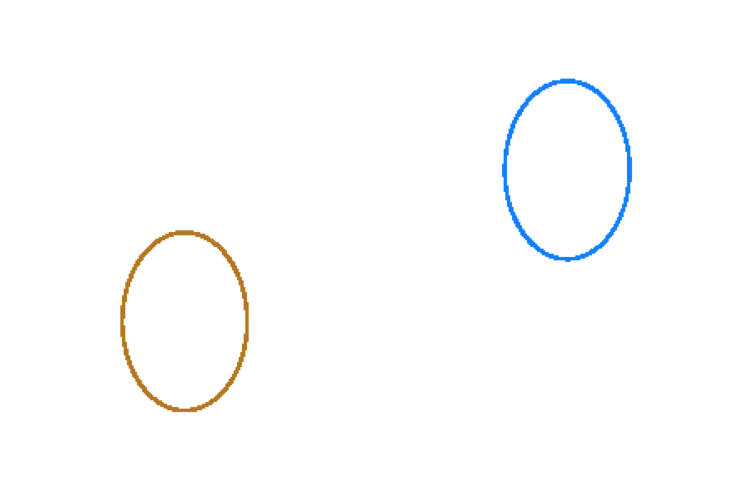

In [43]:
u=random.randint(1, 5) *10    #x-position of the center
v=random.randint(1, 5)  *10   #y-position of the center
a=random.randint(3, 10)     #radius on the x-axis
b=random.randint(3, 10)    #radius on the y-axis

t = np.linspace(0, 2*pi, 100)

u1=random.randint(1, 5)    #x-position of the center
v1=random.randint(1, 5)   #y-position of the center
a1=random.randint(3, 10)   #radius on the x-axis
b1=random.randint(3, 10)   #radius on the y-axis

fig = plt.figure()
line1, = plt.plot( u1+a1*np.cos(t) , v1+b1*np.sin(t) )
line1, = plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )
plt.axis('off')

#redraw the canvas
fig.canvas.draw()

# convert canvas to image
img = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8,sep='')
img  = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))

img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)

make_image(img, '/tmp/out.png')

In [58]:
no_of_points = 2*random.randint(4, 6)

tnumber = [random.randint(0, 100) for x in range(no_of_points)]


In [59]:
points = [u+a*np.cos(tnumber) , v+b*np.sin(tnumber)]
point = np.array(points).T #pairs = (x1,y1), (x2, y2)123456


0
1
2
3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


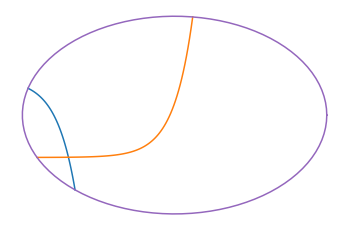

In [60]:
fig = plt.figure()
plt.axis('off')

x = point[0,:]
y = point[1,:]

pairs = np.zeros((no_of_points//2,4))

j = 0
for i in range(no_of_points//2):
  pairs[i//2,0] = point[j,0]
  pairs[i//2,1] = point[j,1]
  pairs[i//2,2] = point[j+1,0]
  pairs[i//2,3] = point[j+1,1]
  j = j + 2
  #print(i)


j=0
for i in range(0,no_of_points//2):
  pairs[i//2,0] = point[j,0]
  pairs[i//2,1] = point[j,1]
  pairs[i//2,2] = point[j+1,0]
  pairs[i//2,3] = point[j+1,1]

  point1 = pairs[i,0:2]
  point2 = pairs[i,2:4]
  print(i)
  j = j + 2
  x,y = hanging_line(point1, point2)

  #plt.plot(point1[0], point1[1], 'o')
  #plt.plot(point2[0], point2[1], 'o')
  plt.plot(x,y)

plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """


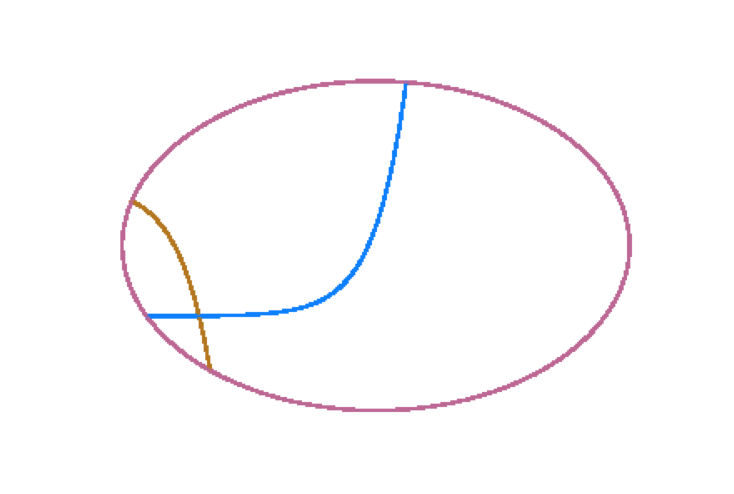

In [61]:
#redraw the canvas
fig.canvas.draw()

# convert canvas to image
img = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8,sep='')
img  = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))

img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)

make_image(img, '/tmp/out.png')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log


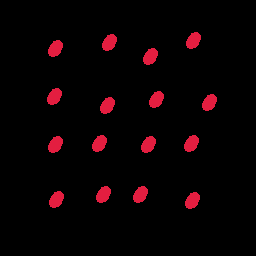

-1

/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:993: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)


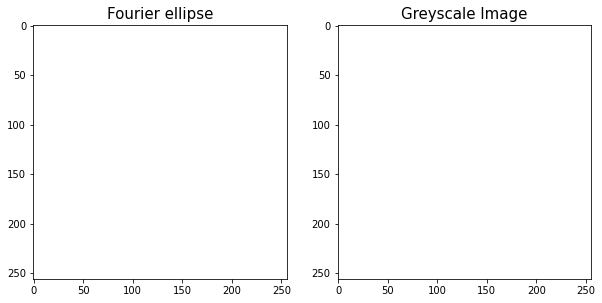

In [16]:
# Python program to explain cv2.ellipse() method
	
image = np.zeros((256,256,3));
no_of_ellipses = (image.shape[0]//50 - 1) * (image.shape[1]//50 - 1) +2
startAngle = 0
endAngle = 360
f_size = 15
thickness = -1
mean = 0
var = 0.1
sigma = var ** 0.5

img = image

mask= np.zeros((no_of_ellipses, 256,256,3), dtype=complex)
fourier_mag= np.zeros((no_of_ellipses, 256,256,3), dtype=float)


grid_space = 50
ctr=0;

for pi in range(image.shape[0]//50 - 1):
  for pj in range(image.shape[0]//50 - 1):
    base = np.zeros((256,256,3));

    #center_coordinates = ((pi + 1)*grid_space + random.randint(-10, 10), (pj + 1)*grid_space + random.randint(-10, 10))
    center_coordinates = ((pi + 1)*grid_space + random.randint(-10, 10), (pj + 1)*grid_space + random.randint(-10, 10))
    u=random.randint(1, 5)     #x-position of the center
    v=random.randint(1, 5)    #y-position of the center
    a=random.randint(3, 10)     #radius on the x-axis
    b=random.randint(3, 10)      #radius on the y-axis
    
    angle = random.randint(0, 180)
    color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    t = np.linspace(0, 2*pi, 100)
    plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )

    #ellipse_image = cv2.ellipse(base, (image.shape[0]//2,image.shape[1]//2), axesLength, angle,
                startAngle, endAngle, color, thickness)
    image = cv2.ellipse(image, center_coordinates, axesLength, angle,
                startAngle, endAngle, color, thickness)



fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(np.log(abs(mask[no_of_ellipses -2,:,:,0])), cmap='gray')
ax[0].set_title('Fourier ellipse', fontsize = f_size)

fourier_mag[:,:,:,0] = np.log(abs(fourier_mag[:,:,:,0]))
ax[1].imshow(((fourier_mag[no_of_ellipses -1,:,:,0])), cmap = 'gray')
ax[1].set_title('Greyscale Image', fontsize = f_size);


# Displaying the image
cv2_imshow(image)


cv2.waitKey(0)

In [ ]:
for noise in range(1):  
  #img = imread('/content/dummy2.png')
  resized_img = cv2.resize(img, (256, 256)) 
  gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)

  mean = noise * 0.01
  var = 0.1
  sigma = var ** 0.5

  gaussian = np.random.normal(mean, sigma, (256, 256)) #  np.zeros((224, 224), np.float32)
  #gray[:, :] = gray[:, :] + gaussian


  #thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  output = cv2.connectedComponentsWithStats(gray, 4, cv2.CV_32S)
  (numLabels, labels, stats, centroids) = output

  #individual component mask
  componentMasks = np.zeros((numLabels +3, 256, 256))
  for cntr in range(stats.shape[0]):
      componentMasks[cntr,:,:] = (labels == cntr).astype("uint8") * 255
      
  #adding complete elements
  componentMasks[10,:,:] = (labels == 1).astype("uint8") * 255 + (labels == 2).astype("uint8") * 255 + (labels == 3).astype("uint8") * 255
  componentMasks[11,:,:] = (labels == 4).astype("uint8") * 255 + (labels == 5).astype("uint8") * 255 + (labels == 6).astype("uint8") * 255
  componentMasks[12,:,:] = (labels == 7).astype("uint8") * 255 + (labels == 8).astype("uint8") * 255 + (labels == 9).astype("uint8") * 255

  #centering individual components
  componentMasks_centered = np.zeros((numLabels+3 , 256, 256)) 
  for k in range(numLabels):
    ret,thresh = cv2.threshold(componentMasks[k],127,255,0)
    thresh = thresh.astype(np.uint8)
    contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

    for i in range(0, len(contours)):
        cnt = contours[i]
        x,y,w,h = cv2.boundingRect(cnt)
        componentMasks_centered[k,128 - h//2:128 - h//2 + h,128 - w//2:128 - w//2 + w] = componentMasks[k, y:y+h, x:x+w]

  #grouped components
  for k in range(10,13):
    ret,thresh = cv2.threshold(componentMasks[k],127,255,0)
    thresh = thresh.astype(np.uint8)
    contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    x_min = 256
    x_max = 0
    y_min = 256
    y_max = 0
    for i in range(0, len(contours)):
          #if (i % 2 == 0):
          cnt = contours[i]
          x,y,w,h = cv2.boundingRect(cnt)
          if (x_min > x):
            x_min = x
          if (y_min > y):
            y_min = y
          if (x_max < x + w):
            x_max = x + w
          if (y_max < y + h):
            y_max = y + h
          w = x_max - x_min
          h = y_max - y_min
          #cv2.rectangle(thresh,(x,y),(x+w,y+h),(255,255,0),2)
          componentMasks_centered[k,128 - h//2:128 - h//2 + h,128 - w//2:128 - w//2 + w] = componentMasks[k, y_min:y_max, x_min:x_max]

  #Fourier mask generation
  mask= np.zeros((componentMasks_centered.shape[0], 256,256), dtype=complex)
  fourier_mag= np.zeros((componentMasks_centered.shape[0], 256,256), dtype=float)
  f_size = 15

  for ctr in range(componentMasks_centered.shape[0]):
    #for k in range(3):
    #mask[i,:,:,k] = fourier_mask(ellipse_image[:,:,k], i)
    mask[ctr,:,:] = np.fft.fftshift(np.fft.fft2((componentMasks_centered[ctr,:,:])))
    for i in range(256):
      for j in range(256):
        fourier_mag[ctr,i,j] = np.sqrt(np.square(mask[ctr,i,j].real) + np.square(mask[ctr,i,j].imag))
        '''
        if (np.isinf(fourier_mag[ctr,i,j])):
          print('hi')
          fourier_mag[ctr,i,j] = 0
        '''
  fourier_mag[np.isinf(fourier_mag)] = 0
  '''
  fig, ax = plt.subplots(1,2,figsize=(10,10))
  ax[0].imshow(np.log(abs(mask[componentMasks_centered.shape[0] -2,:,:])), cmap='gray')
  ax[0].set_title('Fourier ellipse', fontsize = f_size)

  #fourier_mag[:,:,:] = np.log(abs(fourier_mag[:,:,:]))
  ax[1].imshow(((fourier_mag[componentMasks_centered.shape[0] -1,:,:])), cmap = 'gray')
  ax[1].set_title('Greyscale Image', fontsize = f_size);
  '''


  #quantizing 16 levels
  no_of_ellipses = componentMasks_centered.shape[0]
  quant = 4
  range_gap = fourier_mag.shape[1]//quant

  a_nm = np.zeros((no_of_ellipses,quant * quant,4096))


  for k in range(no_of_ellipses):
    ctr1 = 0
    p = 0
    for i in range(quant):
      ctr2 = 0
      for j in range(quant):
        a_nm[k][p][:] = fourier_mag[k,ctr1:ctr1+range_gap,ctr2:ctr2+range_gap].flatten()
        p = p+1
        ctr2 = ctr2 + range_gap     

      ctr1 = ctr1 + range_gap

  #energy calculation
  energy_nm = np.zeros((no_of_ellipses,quant * quant))
  sum_nm = np.zeros((no_of_ellipses,quant * quant))

  for i in range(no_of_ellipses):
    for quad in range(quant * quant):
      for j in range(4096):
        sum_nm[i,quad] = sum_nm[i,quad] + a_nm[i,quad,j] ** 2
        '''
        if (math.isinf(a_nm[i,quad,j] ** 2)):
          print(a_nm[i,quad,j],i,quad,j)
        '''
      energy_nm[i,quad] = np.sqrt(sum_nm[i,quad])
      
  print(noise)
  dunn_plot[noise] = dunn(sum_nm)